# Exploratory Data Analysis

In [7]:
import pandas as pd
from textblob import TextBlob

In [2]:
# read data
review_df = pd.read_csv('movie_review.csv')

In [3]:
review_df.head()

,Movie,Critic,Rating,Source,Review,Date
0,Midway,Sara Michelle Fetters,rotten,MovieFreak.com,"There wasn't any tension or suspense, and by t...","November 17, 2019"
1,Midway,Matt Brunson,rotten,Film Frenzy,Director Roland Emmerich's 1996 smash Independ...,"November 16, 2019"
2,Midway,Jackie K. Cooper,fresh,jackiekcooper.com,"Good historical recounting, and solid special ...","November 15, 2019"
3,Midway,Abigail Camarillo,rotten,Chilango.com,The director of The Day After Tomorrow does no...,"November 15, 2019"
4,Midway,Mark Kermode,rotten,Kermode & Mayo's Film Review,"He's Mr. Bombastic, but he's not very fantasti...","November 15, 2019"


In [4]:
def preprocess_text(review):
    # change all uppercase to lowercase and remove all punctuation
    review_text = review.apply(lambda x: ' '.join(x.lower() for x in x.split()))
    review_text = review_text.str.replace('[^\w\s]', '')
    return review_text

In [5]:
review_df['Review_text'] = preprocess_text(review_df['Review'])

In [6]:
review_df.head()

,Movie,Critic,Rating,Source,Review,Date,Review_text
0,Midway,Sara Michelle Fetters,rotten,MovieFreak.com,"There wasn't any tension or suspense, and by t...","November 17, 2019",there wasnt any tension or suspense and by the...
1,Midway,Matt Brunson,rotten,Film Frenzy,Director Roland Emmerich's 1996 smash Independ...,"November 16, 2019",director roland emmerichs 1996 smash independe...
2,Midway,Jackie K. Cooper,fresh,jackiekcooper.com,"Good historical recounting, and solid special ...","November 15, 2019",good historical recounting and solid special e...
3,Midway,Abigail Camarillo,rotten,Chilango.com,The director of The Day After Tomorrow does no...,"November 15, 2019",the director of the day after tomorrow does no...
4,Midway,Mark Kermode,rotten,Kermode & Mayo's Film Review,"He's Mr. Bombastic, but he's not very fantasti...","November 15, 2019",hes mr bombastic but hes not very fantastic


In [275]:
import re
teststr = review_df['Review_text'][9]
print(teststr)
teststr = re.sub(' full review in spanish', '', teststr)
print(teststr)

the spectacle flies high but the script sinks fast still its better than pearl harbor full review in spanish
the spectacle flies high but the script sinks fast still its better than pearl harbor


In [276]:
review_text = review_df['Review_text'].apply(lambda x: re.sub(' full review in spanish', '', x))

In [277]:
review_text[9]

'the spectacle flies high but the script sinks fast still its better than pearl harbor'

In [49]:
# add more information about review text
review_df['polarity'] = review_df['Review'].map(lambda text: TextBlob(text).sentiment.polarity)
review_df['word_count'] = review_df['Review'].apply(lambda x: len(str(x).split()))

In [63]:
review_df['Date'] = pd.to_datetime(review_df['Date'])

In [67]:
review_df.head()

,Movie,Critic,Rating,Source,Review,Date,Review_text,polarity,word_count
0,Midway,Sara Michelle Fetters,rotten,MovieFreak.com,"There wasn't any tension or suspense, and by t...",2019-11-17,there wasnt any tension or suspense and by the...,0.000000,23
1,Midway,Matt Brunson,rotten,Film Frenzy,Director Roland Emmerich's 1996 smash Independ...,2019-11-16,director roland emmerichs 1996 smash independe...,-0.097619,29
2,Midway,Jackie K. Cooper,fresh,jackiekcooper.com,"Good historical recounting, and solid special ...",2019-11-15,good historical recounting and solid special e...,0.092857,23
3,Midway,Abigail Camarillo,rotten,Chilango.com,The director of The Day After Tomorrow does no...,2019-11-15,the director of the day after tomorrow does no...,0.183333,17
4,Midway,Mark Kermode,rotten,Kermode & Mayo's Film Review,"He's Mr. Bombastic, but he's not very fantasti...",2019-11-15,hes mr bombastic but hes not very fantastic,-0.153846,8


In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Distributions of Sentiment polarity score and Word count in reviews

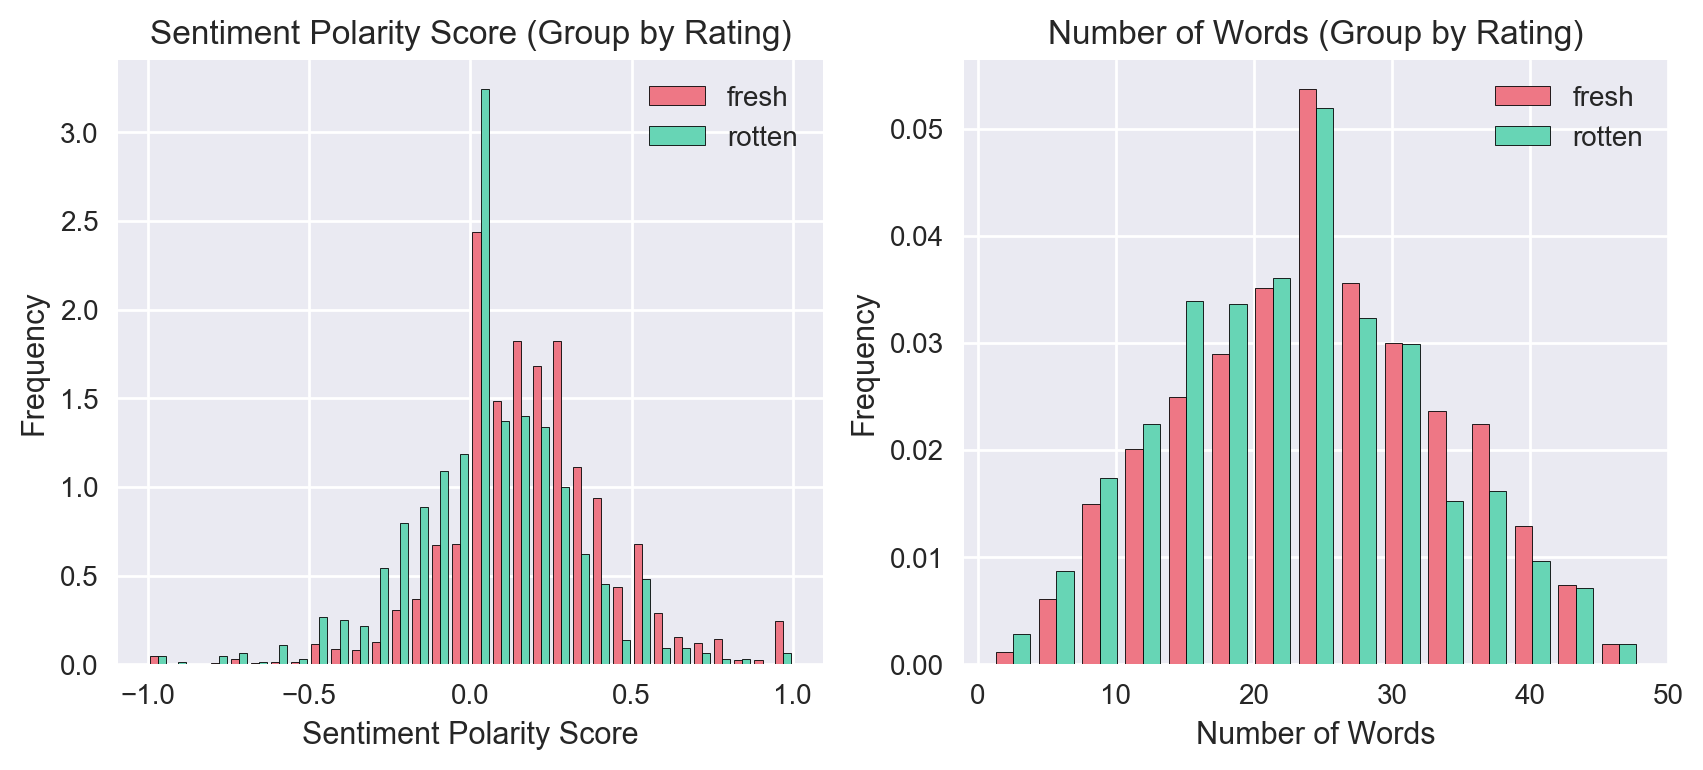

In [62]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=200, figsize=(10, 4))
ax0, ax1 = axes.flatten()

ax0.hist((review_df[review_df['Rating']=='fresh']['polarity'], review_df[review_df['Rating']=='rotten']['polarity']), 
         label=['fresh', 'rotten'], bins=32, color=['#EE7785', '#67D5B5'], edgecolor='black', density=True)
ax0.legend()
ax0.set_xlabel('Sentiment Polarity Score')
ax0.set_ylabel('Frequency')
ax0.set_title('Sentiment Polarity Score (Group by Rating)')

ax1.hist((review_df[review_df['Rating']=='fresh']['word_count'], review_df[review_df['Rating']=='rotten']['word_count']), 
         label=['fresh', 'rotten'], bins=15, color=['#EE7785', '#67D5B5'], edgecolor='black', density=True)
ax1.legend()
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Frequency')
ax1.set_title('Number of Words (Group by Rating)')
plt.show()

In [30]:
pos_count = review_df[review_df['polarity']>0].shape[0]
neg_count = review_df[review_df['polarity']<0].shape[0]
zero_count = review_df[review_df['polarity']==0].shape[0]
total_count = review_df.shape[0]

print('Proportion of positive sentiment polarity score is {:.2f}. \n'.format(pos_count/total_count),
      'Proportion of negative sentiment polarity score is {:.2f}. \n'.format(neg_count/total_count), 
      'Proportion of zero sentiment polarity score is {:.2f}. '.format(zero_count/total_count))

Proportion of positive sentiment polarity score is 0.68. 
 Proportion of negative sentiment polarity score is 0.22. 
 Proportion of zero sentiment polarity score is 0.09. 


## Variation of Ratings with Date

![](https://github.com/hujiayin/WebAnalytics/blob/master/Classifier%20for%20reviews/Date%20filter.png?raw=true)

## Text Visualization

In [68]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopword = stopwords.words('english')

In [101]:
def get_top_m_ngrams(corpus, m=None, ngram=(1, 1), stopwords=None):
    vectorizer = CountVectorizer(stop_words = stopwords, ngram_range=ngram).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:m]

In [264]:
# Lemmatize the review
from textblob import Word
review_df['Review_text_lemma'] = review_df['Review_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

### Top Unigrams

In [247]:
# With stopwords
common_words = get_top_m_ngrams(review_df['Review_text_lemma'], m=20)
common_word_df = pd.DataFrame(common_words, columns = ['Word' , 'Count']).sort_values(by='Count', ascending=False)
common_word_df

,Word,Count
0,the,3640
1,and,2266
2,it,2061
3,of,2048
4,to,1691
5,is,1462
6,in,1144
7,that,905
8,but,708
9,film,685


In [248]:
# Without stopwords
common_words_nostop = get_top_m_ngrams(review_df['Review_text_lemma'], m=20, stopwords='english')
common_word_nostop_df = pd.DataFrame(common_words_nostop, columns = ['Word' , 'Count']).sort_values(by='Count', ascending=False)
common_word_nostop_df

,Word,Count
0,film,685
1,movie,463
2,joker,255
3,like,245
4,ha,241
5,make,214
6,story,211
7,just,198
8,performance,189
9,review,181


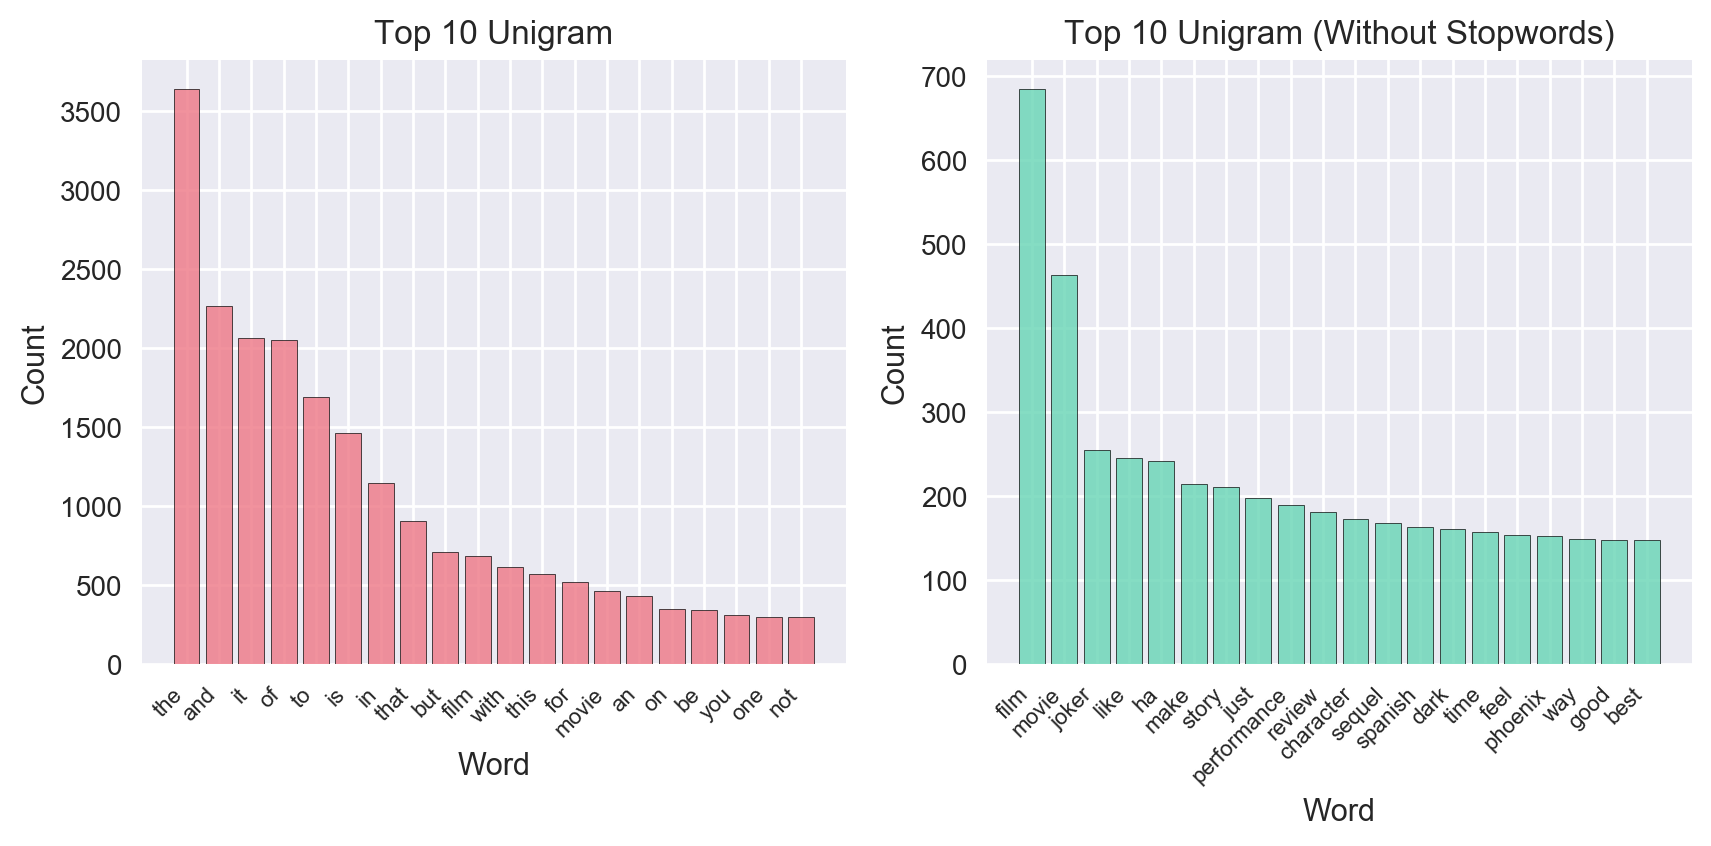

In [259]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=200, figsize=(10, 4))
ax0, ax1 = axes.flatten()

ax0.bar(common_word_df['Word'], common_word_df['Count'], 
        color=['#EE7785'], edgecolor='black', alpha=0.8)
ax0.set_xlabel('Word')
ax0.set_xticklabels(common_word_df['Word'], rotation=45, size=8, horizontalalignment="right")
ax0.set_ylabel('Count')
ax0.set_title('Top 10 Unigram')

ax1.bar(common_word_nostop_df['Word'], common_word_nostop_df['Count'], 
         color=['#67D5B5'], edgecolor='black', alpha=0.8)
ax1.set_xlabel('Word')
ax1.set_xticklabels(common_word_nostop_df['Word'], rotation=45, size=8, horizontalalignment="right")
ax1.set_ylabel('Count')
ax1.set_title('Top 10 Unigram (Without Stopwords)')
plt.show()

### Top bigrams

In [250]:
# With stopwords
common_bigram = get_top_m_ngrams(review_df['Review_text_lemma'], m=20, ngram=(2, 2))
common_bigram_df = pd.DataFrame(common_bigram, 
                                columns = ['Word' , 'Count']).sort_values(by='Count', ascending=False)

# Without stopwords
common_bigram_nostop = get_top_m_ngrams(review_df['Review_text_lemma'], m=20, ngram=(2, 2), stopwords='english')
common_bigram_nostop_df = pd.DataFrame(common_bigram_nostop, 
                                       columns = ['Word' , 'Count']).sort_values(by='Count', ascending=False)


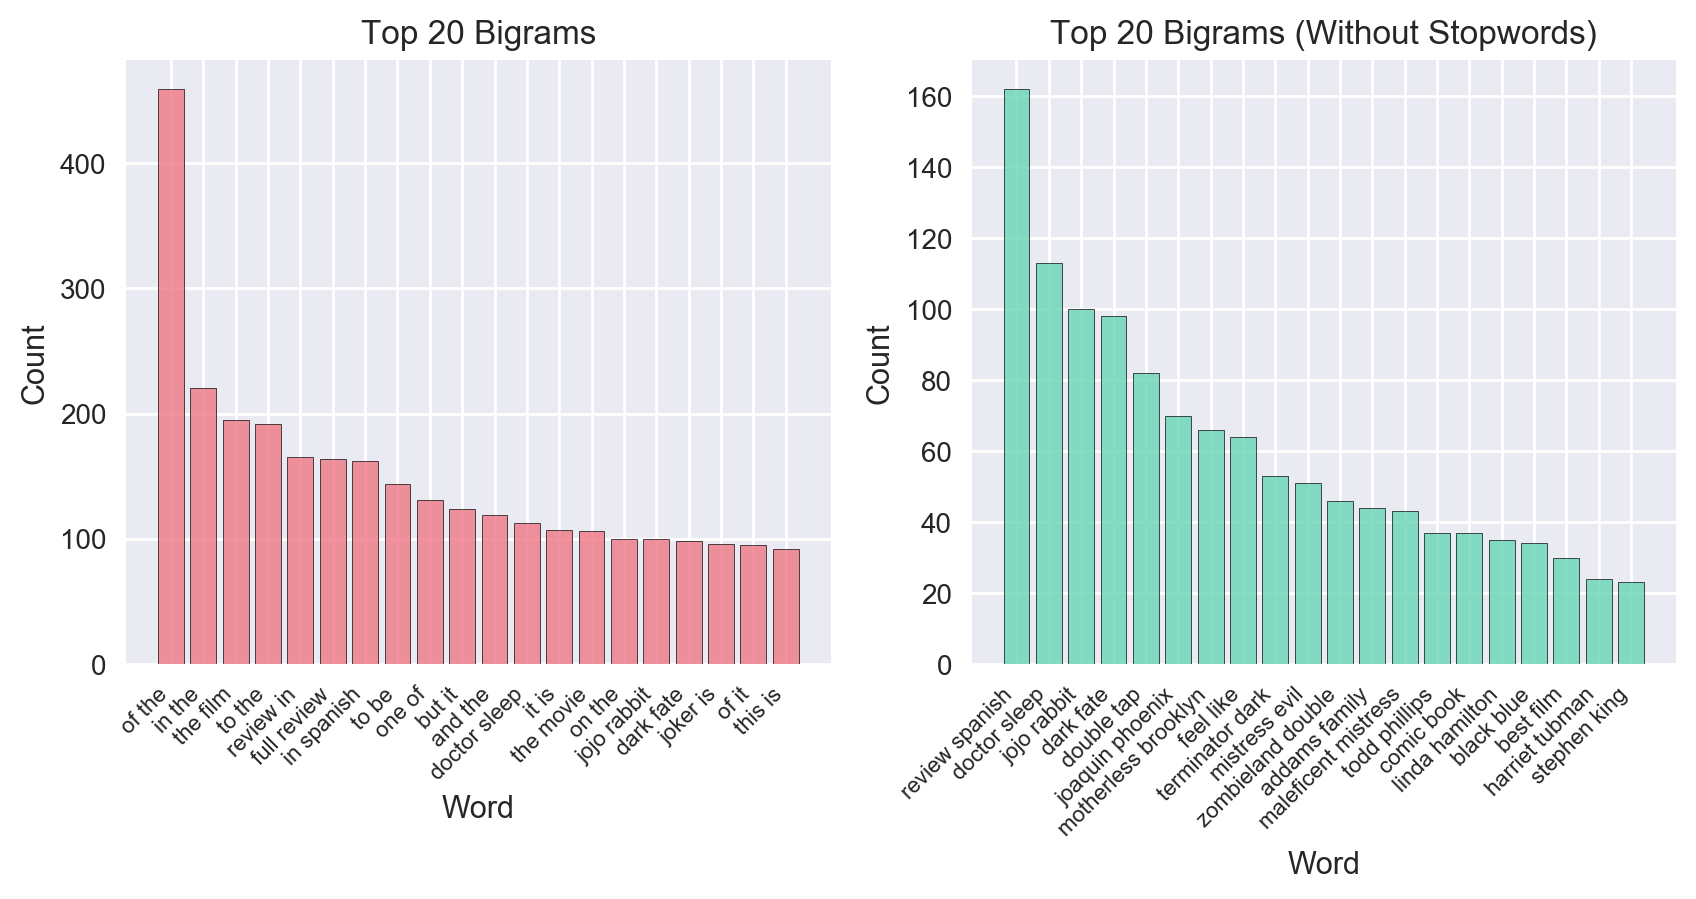

In [251]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=200, figsize=(10, 4))
ax0, ax1 = axes.flatten()

ax0.bar(common_bigram_df['Word'], common_bigram_df['Count'], 
        color=['#EE7785'], edgecolor='black', alpha=0.8)
ax0.set_xlabel('Word')
ax0.set_xticklabels(common_bigram_df['Word'], rotation=45, size=8, horizontalalignment="right")
ax0.set_ylabel('Count')
ax0.set_title('Top 20 Bigrams')

ax1.bar(common_bigram_nostop_df['Word'], common_bigram_nostop_df['Count'], 
         color=['#67D5B5'], edgecolor='black', alpha=0.8)
ax1.set_xlabel('Word')
ax1.set_xticklabels(common_bigram_nostop_df['Word'], rotation=45, size=8, horizontalalignment="right")
ax1.set_ylabel('Count')
ax1.set_title('Top 20 Bigrams (Without Stopwords)')
plt.show()

### Word Cloud

In [252]:
review_df['Review_nostop'] = review_df['Review_text_lemma'].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))

In [253]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import imageio
import numpy as np

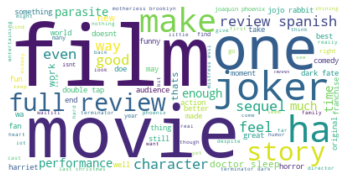

In [254]:
text = ' '.join(review_df['Review_nostop'])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

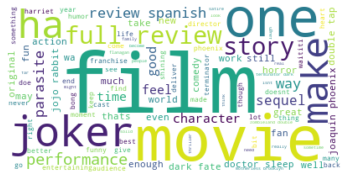

In [255]:
text_fresh = ' '.join(review_df[review_df['Rating']=='fresh']['Review_nostop'])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text_fresh)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

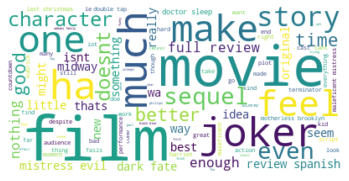

In [256]:
text_rotten = ' '.join(review_df[review_df['Rating']=='rotten']['Review_nostop'])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text_rotten)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

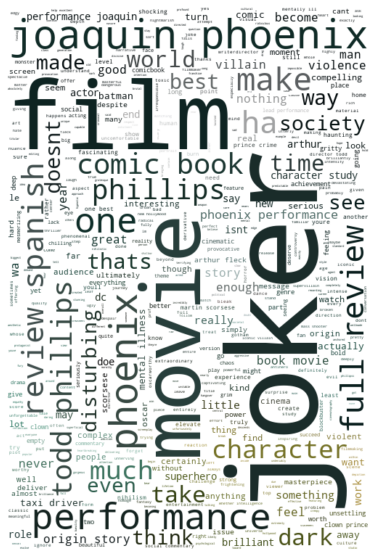

In [262]:
text_joker = ' '.join(review_df[review_df['Movie']=='Joker']['Review_nostop'])
bg_pic = np.array(Image.open('joker-poster-5.jpg'))

# Create and generate a word cloud image:
wordcloud = WordCloud(mask=bg_pic, max_words=500, background_color="white").generate(text_joker)
image_colors = ImageColorGenerator(bg_pic)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

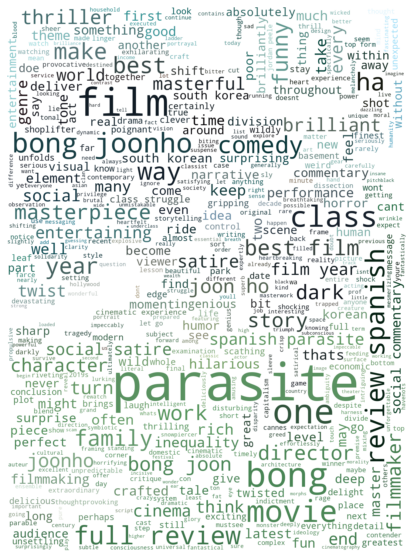

In [263]:
text_parasite = ' '.join(review_df[review_df['Movie']=='Parasite (Gisaengchung)']['Review_nostop'])
bg_pic = np.array(Image.open('parasite.jpg'))

# Create and generate a word cloud image:
wordcloud = WordCloud(mask=bg_pic, max_words=500, background_color="white").generate(text_parasite)
image_colors = ImageColorGenerator(bg_pic)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

## Critics' Ratings

In [148]:
critic_df = pd.DataFrame(review_df.groupby(['Critic'])['Movie'].count())

In [149]:
fresh_critic_df = pd.DataFrame(review_df[review_df['Rating']=='fresh'].\
                               groupby(['Critic'])['Movie'].count())

In [150]:
rotten_critic_df = pd.DataFrame(review_df[review_df['Rating']=='rotten'].\
                               groupby(['Critic'])['Movie'].count())

In [161]:
critic_number_df = critic_df.join(fresh_critic_df, on='Critic', how='left', rsuffix='_Fresh').\
join(rotten_critic_df, on='Critic', how='left', rsuffix='_Rotten').sort_values(by='Movie', ascending=False).\
fillna(0).astype(int)

In [242]:
critic_number_df.to_csv('critic_number.csv')

## Build a Classifier

In [ ]:
# Transform Rating to binary data
review_df['target'] = review_df['Rating'].replace(['rotten', 'fresh'], [0, 1])